Shortest path: [1, 2, 4, 6]
Weighted average Jaccard coefficient for edges: 0.07675438596491228
Weighted average Jaccard coefficient along the path: 0.044444444444444446
Probability of a link: 0.579047619047619


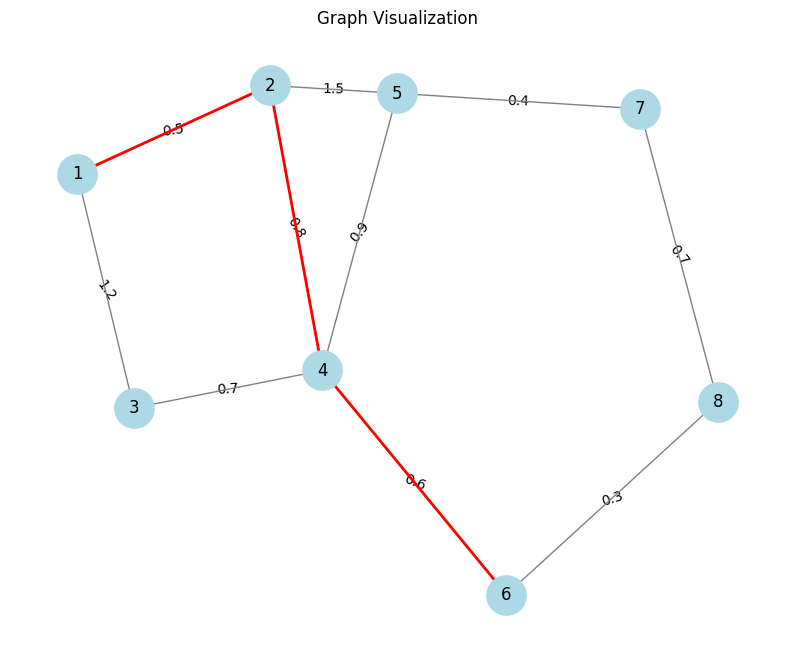

In [35]:
import heapq
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def jaccard_coefficient(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    intersection = neighbors1.intersection(neighbors2)
    union = neighbors1.union(neighbors2)
    if len(union) == 0:
        return 0.0
    return len(intersection) / len(union)

def weighted_average_jaccard_coefficient(G):
    total_weighted_sum = 0.0
    total_weight = 0.0

    for node1, node2, weight in G.edges(data='weight', default=1.0):
        coefficient = jaccard_coefficient(G, node1, node2)
        total_weighted_sum += coefficient * weight
        total_weight += weight

    if total_weight == 0.0:
        return 0.0

    return total_weighted_sum / total_weight

def a_star_jaccard(G, start, goal):
    open_list = []
    closed_list = set()
    g_score = {start: 0}
    f_score = {start: jaccard_coefficient(G, start, goal)}

    heapq.heappush(open_list, (f_score[start], start))

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(G, start, goal, g_score)

        closed_list.add(current)

        for neighbor in G.neighbors(current):
            if neighbor in closed_list:
                continue

            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + jaccard_coefficient(G, neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

def reconstruct_path(G, start, goal, g_score):
    current = goal
    path = [current]
    while current != start:
        current = min(G.neighbors(current), key=lambda neighbor: g_score.get(neighbor, float('inf')))
        path.append(current)
    path.reverse()
    return path

# Example usage
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Add edges to the graph with weights
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 3, weight=1.2)
G.add_edge(2, 4, weight=0.8)
G.add_edge(2, 5, weight=1.5)
G.add_edge(3, 4, weight=0.7)
G.add_edge(4, 5, weight=0.9)
G.add_edge(4, 6, weight=0.6)
G.add_edge(5, 7, weight=0.4)
G.add_edge(6, 8, weight=0.3)
G.add_edge(7, 8, weight=0.7)

start_node = 1
goal_node = 6

path = a_star_jaccard(G, start_node, goal_node)
print("Shortest path:", path)

average_coefficient = weighted_average_jaccard_coefficient(G)
print("Weighted average Jaccard coefficient for edges:", average_coefficient)

total_weighted_coefficient = 0.0
for i in range(len(path) - 1):
    node1 = path[i]
    node2 = path[i + 1]
    coefficient = jaccard_coefficient(G, node1, node2)
    weight = G[node1][node2]['weight']
    total_weighted_coefficient += coefficient * weight

average_path_coefficient = total_weighted_coefficient / (len(path) - 1)
print("Weighted average Jaccard coefficient along the path:", average_path_coefficient)

# Calculate probability of link
probability_of_link = average_path_coefficient / average_coefficient
print("Probability of a link:", probability_of_link)

# Visualization
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 8))

# Draw edges with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)

# Draw nodes
nx.draw_networkx_nodes(G, pos=pos, node_color='lightblue', node_size=800)

# Draw edges
nx.draw_networkx_edges(G, pos=pos, edge_color='gray')

# Highlight the nodes in the path
path_edges = list(zip(path[:-1], path[1:]))
nx.draw_networkx_edges(G, pos=pos, edgelist=path_edges, edge_color='red', width=2.0)

# Label nodes
nx.draw_networkx_labels(G, pos=pos, font_size=12, font_color='black')

plt.title("Graph Visualization")
plt.axis("off")
plt.show()


In [32]:
import networkx as nx

def jaccard_coefficient(G, u, v):
    neighbors_u = set(G.neighbors(u))
    neighbors_v = set(G.neighbors(v))

    # Calculate the Jaccard coefficient
    intersection = len(neighbors_u.intersection(neighbors_v))
    union = len(neighbors_u.union(neighbors_v))
    coefficient = intersection / union if union != 0 else 0

    return coefficient

# Create the graph
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 3, weight=1.2)
G.add_edge(2, 4, weight=0.8)
G.add_edge(2, 5, weight=1.5)
G.add_edge(3, 4, weight=0.7)
G.add_edge(4, 5, weight=0.9)
G.add_edge(4, 6, weight=0.6)
G.add_edge(5, 7, weight=0.4)
G.add_edge(6, 8, weight=0.3)
G.add_edge(7, 8, weight=0.7)

start_node = 1
goal_node = 4

coefficient = jaccard_coefficient(G, start_node, goal_node)
print(f"The Jaccard coefficient between node {start_node} and node {goal_node} is {coefficient}")


The Jaccard coefficient between node 1 and node 4 is 0.5


Shortest path: [1, 2, 4]
Weighted average Adamic-Adar index for edges: 0.3459773639384665
Weighted average Adamic-Adar index along the path: 0.36409569065073494
Probability of a link: 1.0523685321664304


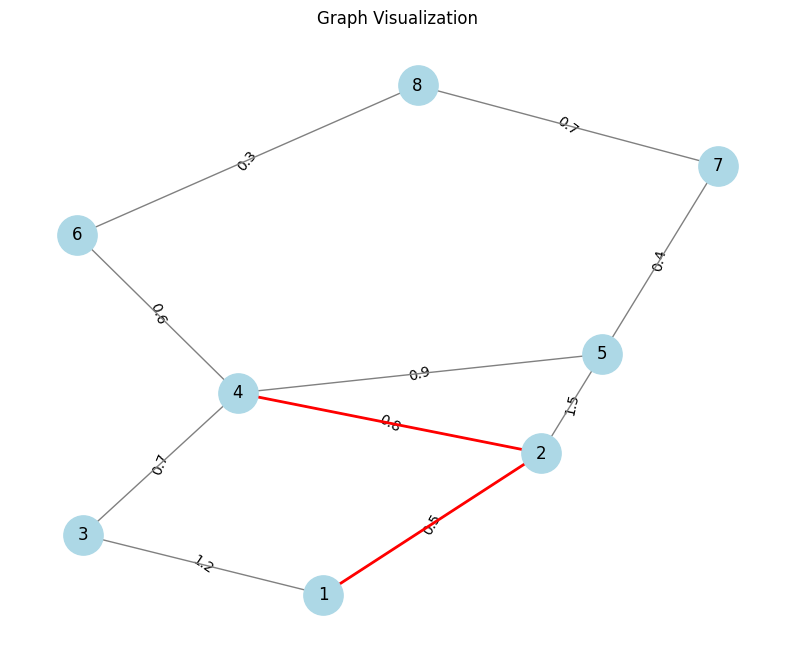

In [34]:
import heapq
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def adamic_adar_index(G, node1, node2):
    neighbors1 = set(G.neighbors(node1))
    neighbors2 = set(G.neighbors(node2))
    common_neighbors = neighbors1.intersection(neighbors2)

    index = 0.0
    for neighbor in common_neighbors:
        degree = G.degree(neighbor)
        if degree > 1:
            index += 1 / np.log(degree)

    return index

def weighted_average_adamic_adar_index(G):
    total_weighted_sum = 0.0
    total_weight = 0.0

    for node1, node2, weight in G.edges(data='weight', default=1.0):
        index = adamic_adar_index(G, node1, node2)
        total_weighted_sum += index * weight
        total_weight += weight

    if total_weight == 0.0:
        return 0.0

    return total_weighted_sum / total_weight

def a_star_adamic_adar(G, start, goal):
    open_list = []
    closed_list = set()
    g_score = {start: 0}
    f_score = {start: adamic_adar_index(G, start, goal)}

    heapq.heappush(open_list, (f_score[start], start))

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(G, start, goal, g_score)

        closed_list.add(current)

        for neighbor in G.neighbors(current):
            if neighbor in closed_list:
                continue

            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + adamic_adar_index(G, neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

def reconstruct_path(G, start, goal, g_score):
    current = goal
    path = [current]
    while current != start:
        current = min(G.neighbors(current), key=lambda neighbor: g_score.get(neighbor, float('inf')))
        path.append(current)
    path.reverse()
    return path

# Example usage
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])

# Add edges to the graph with weights
G.add_edge(1, 2, weight=0.5)
G.add_edge(1, 3, weight=1.2)
G.add_edge(2, 4, weight=0.8)
G.add_edge(2, 5, weight=1.5)
G.add_edge(3, 4, weight=0.7)
G.add_edge(4, 5, weight=0.9)
G.add_edge(4, 6, weight=0.6)
G.add_edge(5, 7, weight=0.4)
G.add_edge(6, 8, weight=0.3)
G.add_edge(7, 8, weight=0.7)

start_node = 1
goal_node = 4

path = a_star_adamic_adar(G, start_node, goal_node)
print("Shortest path:", path)

average_index = weighted_average_adamic_adar_index(G)
print("Weighted average Adamic-Adar index for edges:", average_index)

total_weighted_index = 0.0
for i in range(len(path) - 1):
    node1 = path[i]
    node2 = path[i + 1]
    index = adamic_adar_index(G, node1, node2)
    weight = G[node1][node2]['weight']
    total_weighted_index += index * weight

average_path_index = total_weighted_index / (len(path) - 1)
print("Weighted average Adamic-Adar index along the path:", average_path_index)

# Calculate probability of link
probability_of_link = average_path_index / average_index
print("Probability of a link:", probability_of_link)

# Visualization
pos = nx.spring_layout(G)

plt.figure(figsize=(10, 8))

# Draw edges with weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_size=10, label_pos=0.5)

# Draw nodes
nx.draw_networkx_nodes(G, pos=pos, node_color='lightblue', node_size=800)

# Draw edges
nx.draw_networkx_edges(G, pos=pos, edge_color='gray')

# Highlight the nodes in the path
path_edges = list(zip(path[:-1], path[1:]))
nx.draw_networkx_edges(G, pos=pos, edgelist=path_edges, edge_color='red', width=2.0)

# Label nodes
nx.draw_networkx_labels(G, pos=pos, font_size=12, font_color='black')

plt.title("Graph Visualization")
plt.axis("off")
plt.show()
